In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
df=pd.read_csv("births.csv")

In [195]:
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [196]:
#Indexing
#Missing value manipulation
#concat
#append
#merge and join
#aggregation
#grouping
#transform
#apply
#pivot tables

<h2>PART-A</h2>

<p><b>Indexing</b></p>

In [197]:
#Slicing like arrays
df_1=df[:]
#Slicing by rows
df_2=df[:15544]
#Slicing by columns
df_3=df_2.iloc[:,0:3]
#slicing by rows
df_4=df[15544:15547]
#slicing by columns
df_5=df_2.iloc[:,3:]
#slicing by columns
df_6=df_4.iloc[:,3:]
#slicing by columns
df_7=df_4.iloc[:,0:3]

In [198]:
df_1.shape

(15547, 5)

In [199]:
df_2.shape

(15544, 5)

In [200]:
df_3.shape

(15544, 3)

In [201]:
df_4.shape

(3, 5)

In [202]:
df_5.shape

(15544, 2)

In [203]:
df_6.shape

(3, 2)

In [204]:
df_7.shape

(3, 3)

<p><b>Missing value manipulation</b></p>

In [205]:
#finding missing_values

In [206]:
df.isna().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [207]:
#manipulating missing values by dropping those rows

In [208]:
new_df=df.dropna()

In [209]:
new_df.isna().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [210]:
print("Initial datatset size : ",df.shape)
print("After manipulation : ",new_df.shape)

Initial datatset size :  (15547, 5)
After manipulation :  (15067, 5)


In [211]:
#manipulating missing values by replacing NaN with values

In [212]:
#replace by 0
new_df_1=df.fillna(0)
#replace by mean
new_df_2=df.fillna(df.day.mean())
#replace by forward fill - rows
new_df_3=df.fillna(method="ffill",axis=0)
#replace by forward fill - columns
new_df_4=df.fillna(method="ffill",axis=1)
#replace by backward fill - rows
new_df_5=df.fillna(method="bfill",axis=0)
#replace by backward fill - columns
new_df_6=df.fillna(method="bfill",axis=1)

In [213]:
df.day.values

array([ 1.,  1.,  2., ..., nan, nan, nan])

In [214]:
new_df_1.day.values

array([1., 1., 2., ..., 0., 0., 0.])

In [215]:
new_df_2.day.values

array([ 1.        ,  1.        ,  2.        , ..., 17.76989447,
       17.76989447, 17.76989447])

In [216]:
new_df_3.day.values

array([ 1.,  1.,  2., ..., 31., 31., 31.])

In [217]:
new_df_4.day.values

array([1.0, 1.0, 2.0, ..., 11, 12, 12], dtype=object)

In [218]:
new_df_5.day.values
#we will get nan values because the values below the nan are also nan in this dataset

array([ 1.,  1.,  2., ..., nan, nan, nan])

In [219]:
new_df_6.day.values

array([1.0, 1.0, 2.0, ..., 'M', 'F', 'M'], dtype=object)

<p><b>Concat and Joins</b></p>

In [220]:
print("Concat gives the flexibility to join based on the axis( all rows or all columns)")

Concat gives the flexibility to join based on the axis( all rows or all columns)


In [221]:
print("Concat - Inner Join ")
print("")
print("")
print("Inner Join (w.r.t set A and set B) ==> A intersection B")
print("")
print("")
print("Example - ")
print("")
print("Dataframe A : ")
print("")
print(df.iloc[:,0:3].head())
print("")
print("Dataframe B : ")
print("")
print(df.iloc[:,2:5].head())
print("")
print("Concatenated result (using Inner Join) :")
print(pd.concat((df.iloc[:,0:3],df.iloc[:,2:5]),join="inner").head())

Concat - Inner Join 


Inner Join (w.r.t set A and set B) ==> A intersection B


Example - 

Dataframe A : 

   year  month  day
0  1969      1  1.0
1  1969      1  1.0
2  1969      1  2.0
3  1969      1  2.0
4  1969      1  3.0

Dataframe B : 

   day gender  births
0  1.0      F    4046
1  1.0      M    4440
2  2.0      F    4454
3  2.0      M    4548
4  3.0      F    4548

Concatenated result (using Inner Join) :
   day
0  1.0
1  1.0
2  2.0
3  2.0
4  3.0


In [222]:
print("Concat - Full Outer Join ")
print("")
print("")
print("Inner Join (w.r.t set A and set B) ==> A union B ")
print("")
print("")
print("Example - ")
print("")
print("Dataframe A : ")
print("")
print(df.head())
print("")
print("Dataframe B : ")
print("")
print(df.iloc[:,0:3].head())
print("")
print("Concatenated result (using Outer Join) :")
print(pd.concat((df,df.iloc[:,0:3]),join="outer").head())

Concat - Full Outer Join 


Inner Join (w.r.t set A and set B) ==> A union B 


Example - 

Dataframe A : 

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

Dataframe B : 

   year  month  day
0  1969      1  1.0
1  1969      1  1.0
2  1969      1  2.0
3  1969      1  2.0
4  1969      1  3.0

Concatenated result (using Outer Join) :
   year  month  day gender  births
0  1969      1  1.0      F  4046.0
1  1969      1  1.0      M  4440.0
2  1969      1  2.0      F  4454.0
3  1969      1  2.0      M  4548.0
4  1969      1  3.0      F  4548.0


<p><b>Merge and Joins</b></p>

In [223]:
print("Merge is based on any particular column each of the two dataframes, this columns are variables on like 'left_on', 'right_on', 'on'")

Merge is based on any particular column each of the two dataframes, this columns are variables on like 'left_on', 'right_on', 'on'


In [224]:
pd.merge(df,df.iloc[:,0:3],how='inner',on="month")

,year_x,month,day_x,gender,births,year_y,day_y
0,1969,1,1.0,F,4046,1969,1.0
1,1969,1,1.0,F,4046,1969,1.0
2,1969,1,1.0,F,4046,1969,2.0
3,1969,1,1.0,F,4046,1969,2.0
4,1969,1,1.0,F,4046,1969,3.0
...,...,...,...,...,...,...,...
20146786,2008,12,NaN,M,181235,2006,NaN
20146787,2008,12,NaN,M,181235,2007,NaN
20146788,2008,12,NaN,M,181235,2007,NaN
20146789,2008,12,NaN,M,181235,2008,NaN


In [225]:
pd.merge(df,df.iloc[:,0:3],how='left',on="month")

,year_x,month,day_x,gender,births,year_y,day_y
0,1969,1,1.0,F,4046,1969,1.0
1,1969,1,1.0,F,4046,1969,1.0
2,1969,1,1.0,F,4046,1969,2.0
3,1969,1,1.0,F,4046,1969,2.0
4,1969,1,1.0,F,4046,1969,3.0
...,...,...,...,...,...,...,...
20146786,2008,12,NaN,M,181235,2006,NaN
20146787,2008,12,NaN,M,181235,2007,NaN
20146788,2008,12,NaN,M,181235,2007,NaN
20146789,2008,12,NaN,M,181235,2008,NaN


In [226]:
pd.merge(df,df.iloc[:,0:3],how='right',on="month")

,year_x,month,day_x,gender,births,year_y,day_y
0,1969,1,1.0,F,4046,1969,1.0
1,1969,1,1.0,M,4440,1969,1.0
2,1969,1,2.0,F,4454,1969,1.0
3,1969,1,2.0,M,4548,1969,1.0
4,1969,1,3.0,F,4548,1969,1.0
...,...,...,...,...,...,...,...
20146786,2006,12,NaN,M,182459,2008,NaN
20146787,2007,12,NaN,F,173787,2008,NaN
20146788,2007,12,NaN,M,181426,2008,NaN
20146789,2008,12,NaN,F,173215,2008,NaN


In [227]:
pd.merge(df,df.iloc[:,0:3],how='outer',on="month")

,year_x,month,day_x,gender,births,year_y,day_y
0,1969,1,1.0,F,4046,1969,1.0
1,1969,1,1.0,F,4046,1969,1.0
2,1969,1,1.0,F,4046,1969,2.0
3,1969,1,1.0,F,4046,1969,2.0
4,1969,1,1.0,F,4046,1969,3.0
...,...,...,...,...,...,...,...
20146786,2008,12,NaN,M,181235,2006,NaN
20146787,2008,12,NaN,M,181235,2007,NaN
20146788,2008,12,NaN,M,181235,2007,NaN
20146789,2008,12,NaN,M,181235,2008,NaN


<p><b>Append</b></p>

In [228]:
print("Append is the specific case(axis=0, join='outer') of concat")

Append is the specific case(axis=0, join='outer') of concat


In [229]:
print("Shape of dataframe A",df_2.shape)
print("Shape of dataframe B",df_4.shape)
print("Shape of after appending A and B",df_2.append(df_4).shape)

Shape of dataframe A (15544, 5)
Shape of dataframe B (3, 5)
Shape of after appending A and B (15547, 5)


<p><b>Aggregration</b></p>

In [230]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [231]:
df=df.dropna()
count=df.count()
minimum=df.min()
maximum=df.max()
stdev=df.std()
variance=df.var()
summ=df.sum()
product=df.prod()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


In [232]:
print("Total elements in the dataset : ")
print("")
print(count)
print("")
print("Minimum element in the dataset : ")
print("")
print(minimum)
print("")
print("Maximum element in the dataset : ")
print("")
print(maximum)
print("")
print("Standard Deviation : ")
print("")
print(stdev)
print("")
print("Variance : ")
print("")
print(variance)
print("")
print("Sum : ")
print("")
print(summ)
print("")
print("Product : ")
print("")
print(product)

Total elements in the dataset : 

year      15067
month     15067
day       15067
gender    15067
births    15067
dtype: int64

Minimum element in the dataset : 

year      1969
month        1
day        1.0
gender       F
births       1
dtype: object

Maximum element in the dataset : 

year      1988
month       12
day       99.0
gender       M
births    6527
dtype: object

Standard Deviation : 

year         5.762018
month        3.449554
day         15.284034
births    1003.104707
dtype: float64

Variance : 

year      3.320085e+01
month     1.189942e+01
day       2.336017e+02
births    1.006219e+06
dtype: float64

Sum : 

year                                               29808815
month                                                 98183
day                                                267739.0
gender    FMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFM...
births                                             70492941
dtype: object

Product : 

year      0.0
month     0.0
day       i

<p><b>Groupby</b></p>

In [233]:
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


In [234]:
#sample group by observations

In [235]:
df.groupby("year")["month"].median()

year
1969    6.5
1970    6.5
1971    7.0
1972    7.0
1973    7.0
1974    7.0
1975    7.0
1976    7.0
1977    7.0
1978    7.0
1979    7.0
1980    7.0
1981    7.0
1982    7.0
1983    7.0
1984    7.0
1985    7.0
1986    7.0
1987    7.0
1988    6.0
Name: month, dtype: float64

In [236]:
df.groupby("year")["day"].median()

year
1969    16.5
1970    16.5
1971    16.0
1972    16.0
1973    16.0
1974    16.0
1975    16.0
1976    16.0
1977    16.0
1978    16.0
1979    16.0
1980    16.0
1981    16.0
1982    16.0
1983    16.0
1984    16.0
1985    16.0
1986    16.0
1987    16.0
1988    16.0
Name: day, dtype: float64

In [237]:
df.groupby("year")["gender"].count()

year
1969    768
1970    768
1971    764
1972    765
1973    762
1974    766
1975    763
1976    761
1977    761
1978    761
1979    747
1980    747
1981    745
1982    748
1983    749
1984    747
1985    737
1986    736
1987    733
1988    739
Name: gender, dtype: int64

In [238]:
df.groupby("year")["births"].median()

year
1969    4930.0
1970    5101.0
1971    4936.0
1972    4493.0
1973    4334.5
1974    4347.5
1975    4360.0
1976    4358.0
1977    4614.0
1978    4594.0
1979    4821.0
1980    4976.0
1981    5028.0
1982    5123.5
1983    5116.0
1984    5070.0
1985    5271.0
1986    5296.5
1987    5421.0
1988    5510.0
Name: births, dtype: float64

<p><b>Transform</b></p>

In [239]:
#sample transformations

In [240]:
df.groupby("year").transform(lambda x:x-x.mean())

,month,day,births
0,-5.50000,-17.593750,-641.768229
1,-5.50000,-17.593750,-247.768229
2,-5.50000,-16.593750,-233.768229
3,-5.50000,-16.593750,-139.768229
4,-5.50000,-15.593750,-139.768229
...,...,...,...
15062,5.49797,12.454668,647.933694
15063,5.49797,13.454668,445.933694
15064,5.49797,13.454668,798.933694
15065,5.49797,14.454668,-861.066306


<p><b>Apply</b></p>

In [241]:
#example of apply() method

In [242]:
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


In [243]:
def month_and_day(x):
    x["count"]=1
    return x

In [244]:
test=df[["year","month","day"]]

In [245]:
test.head()

,year,month,day
0,1969,1,1.0
1,1969,1,1.0
2,1969,1,2.0
3,1969,1,2.0
4,1969,1,3.0


In [246]:
test.groupby("year").apply(month_and_day)

,year,month,day,count
0,1969,1,1.0,1
1,1969,1,1.0,1
2,1969,1,2.0,1
3,1969,1,2.0,1
4,1969,1,3.0,1
...,...,...,...,...
15062,1988,12,29.0,1
15063,1988,12,30.0,1
15064,1988,12,30.0,1
15065,1988,12,31.0,1


<p><b>Pivot Tables</b></p>

In [247]:
#Example of a pivot table

In [248]:
test=df[["year","month","day"]]

In [249]:
test.pivot_table(index="month",columns="year")

day                                                        \
year       1969      1970       1971       1972       1973       1974   
month                                                                   
1      18.59375  18.59375  18.593750  18.593750  18.593750  18.593750   
2      18.59375  18.59375  18.032787  18.209677  17.800000  18.225806   
3      18.59375  18.59375  18.593750  18.593750  18.593750  18.593750   
4      18.59375  18.59375  18.593750  18.593750  18.396825  18.593750   
5      18.59375  18.59375  18.593750  18.593750  18.593750  18.593750   
6      18.59375  18.59375  18.396825  18.396825  18.593750  18.593750   
7      18.59375  18.59375  18.593750  18.593750  18.593750  18.593750   
8      18.59375  18.59375  18.593750  18.593750  18.593750  18.593750   
9      18.59375  18.59375  18.593750  18.593750  18.593750  18.593750   
10     18.59375  18.59375  18.593750  18.593750  18.593750  18.593750   
11     18.59375  18.59375  18.593750  18.593750  18.396825  18.593750   
12     18.59375  18.59375  18.593750  18.593750  18.593750  18.593750   

                                                                         \
year        1975       1976       1977       1978       1979       1980   
month                                                                     
1      18.593750  18.593750  17.317460  16.000000  16.000000  16.000000   
2      18.016393  18.000000  18.032787  17.317460  17.413793  16.423729   
3      18.593750  18.593750  18.593750  16.000000  18.593750  18.593750   
4      18.593750  18.396825  15.754098  18.593750  16.868852  18.193548   
5      18.593750  18.593750  18.593750  18.593750  17.317460  16.000000   
6      18.593750  18.396825  18.593750  18.396825  16.868852  18.193548   
7      18.593750  18.593750  18.593750  17.317460  17.317460  17.317460   
8      18.593750  18.593750  18.593750  18.593750  18.593750  16.000000   
9      18.593750  18.396825  18.593750  18.593750  18.193548  18.193548   
10     17.317460  18.593750  18.593750  18.593750  17.317460  18.593750   
11     17.317460  17.317460  18.593750  18.593750  18.193548  18.193548   
12     18.593750  18.593750  18.593750  18.593750  18.593750  17.317460   

                                                                         \
year        1981       1982       1983       1984       1985       1986   
month                                                                     
1      18.593750  17.317460  18.593750  18.593750  18.593750  16.000000   
2      17.413793  17.413793  17.413793  16.423729  17.413793  17.413793   
3      16.000000  18.593750  18.593750  17.317460  16.000000  16.000000   
4      15.500000  18.193548  18.193548  18.193548  16.868852  15.500000   
5      17.317460  16.000000  17.317460  17.317460  16.000000  16.000000   
6      18.193548  16.868852  18.193548  18.193548  15.500000  15.500000   
7      17.317460  18.593750  18.593750  17.317460  16.000000  17.317460   
8      17.317460  18.593750  18.593750  17.317460  17.317460  16.000000   
9      16.868852  16.868852  16.868852  16.868852  15.500000  16.868852   
10     18.593750  18.593750  17.317460  16.000000  16.000000  16.000000   
11     18.193548  18.193548  16.868852  18.193548  16.868852  16.868852   
12     17.317460  17.317460  17.317460  17.317460  16.000000  17.317460   

                             
year        1987       1988  
month                        
1      16.000000  16.000000  
2      15.982456  15.000000  
3      17.317460  18.593750  
4      16.868852  16.868852  
5      16.000000  17.317460  
6      15.500000  18.193548  
7      16.000000  16.000000  
8      16.000000  16.000000  
9      15.500000  15.500000  
10     16.000000  17.317460  
11     15.500000  15.500000  
12     16.000000  16.000000

<h2></h2>

<h2>PART-B</h2>

<h3>Q-2</h3>

In [270]:
df=pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv")

In [271]:
df

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0
...,...,...,...,...
87595,09/30/2022 07:00:00 PM,168.0,57.0,111.0
87596,09/30/2022 08:00:00 PM,73.0,33.0,40.0
87597,09/30/2022 09:00:00 PM,69.0,30.0,39.0
87598,09/30/2022 10:00:00 PM,51.0,10.0,41.0


<p><b>Index by time</b></p>

In [272]:
df.dtypes

Date                             object
Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [273]:
list=df.Date

In [274]:
new=pd.DatetimeIndex(list)

In [275]:
new

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2022-09-30 14:00:00', '2022-09-30 15:00:00',
               '2022-09-30 16:00:00', '2022-09-30 17:00:00',
               '2022-09-30 18:00:00', '2022-09-30 19:00:00',
               '2022-09-30 20:00:00', '2022-09-30 21:00:00',
               '2022-09-30 22:00:00', '2022-09-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=87600, freq=None)

In [276]:
lister=[]
for i in range(len(new)):
    lister.append(i)
data = pd.Series(lister,index=new)

In [277]:
data["2012-10-03 00:00:00":"2022-09-30 15:00:00"]

Date
2012-10-03 00:00:00        0
2012-10-03 01:00:00        1
2012-10-03 02:00:00        2
2012-10-03 03:00:00        3
2012-10-03 04:00:00        4
                       ...  
2022-09-30 11:00:00    87587
2022-09-30 12:00:00    87588
2022-09-30 13:00:00    87589
2022-09-30 14:00:00    87590
2022-09-30 15:00:00    87591
Length: 87592, dtype: int64

In [278]:
data.shape

(87600,)

In [279]:
data["2012-10-03 00:00:00":"2022-09-30 15:00:00"].shape

(87592,)

<p><b> Resample</b></p>

In [280]:
df.Date=df.Date.astype("datetime64[ns]")

In [281]:
df.dtypes

Date                            datetime64[ns]
Fremont Bridge Total                   float64
Fremont Bridge East Sidewalk           float64
Fremont Bridge West Sidewalk           float64
dtype: object

In [282]:
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03 00:00:00,13.0,4.0,9.0
1,2012-10-03 01:00:00,10.0,4.0,6.0
2,2012-10-03 02:00:00,2.0,1.0,1.0
3,2012-10-03 03:00:00,5.0,2.0,3.0
4,2012-10-03 04:00:00,7.0,6.0,1.0


In [283]:
df.dropna(inplace=True)
df.set_index("Date",inplace=True)

In [284]:
print("Hours - 5 Mins")
print("")
df.resample('5Min').mean().head()

Hours - 5 Mins



,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 00:05:00,NaN,NaN,NaN
2012-10-03 00:10:00,NaN,NaN,NaN
2012-10-03 00:15:00,NaN,NaN,NaN
2012-10-03 00:20:00,NaN,NaN,NaN


In [285]:
print("Month wise : ")
df.resample('M').mean().head()

Month wise : 


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,94.389368,48.511494,45.877874
2012-11-30,70.343056,36.197222,34.145833
2012-12-31,48.883065,25.010753,23.872312
2013-01-31,60.327957,30.793011,29.534946
2013-02-28,74.444940,38.538690,35.906250


<p><b>Time Shifts</b></p>

In [287]:
import seaborn as sns

<ipython-input-292-3890648c3466>:5: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  df.tshift(300).plot(ax=ax[2])


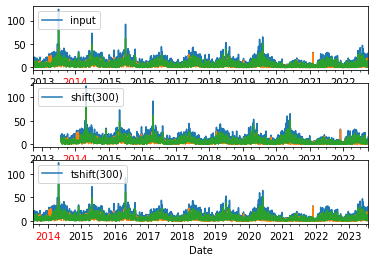

In [292]:
fig, ax = plt.subplots(3, sharey=True)
df = df.asfreq('D', method='pad')
df.plot(ax=ax[0])
df.shift(300).plot(ax=ax[1])
df.tshift(300).plot(ax=ax[2])
local_max = pd.to_datetime('2006-10-03')
offset = pd.Timedelta(300, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(300)'], loc=2)
ax[1].get_xticklabels()[2].set(color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(300)'], loc=2)
ax[2].get_xticklabels()[1].set( color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

<p><b>Rolling Windows</b></p>

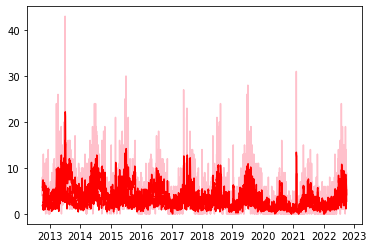

In [294]:
rolling = df.rolling(window=5)
rolling_mean = rolling.mean()
rolling_std = rolling.std()
plt.plot(df.index,df['Fremont Bridge East Sidewalk'], color='pink', label='original')
plt.plot(rolling_mean.index, rolling_mean['Fremont Bridge East Sidewalk'], color='r', label='transformed')
plt.plot(rolling_std.index, rolling_std['Fremont Bridge East Sidewalk'], color='r', label='transformed')
plt.show()

<p><b>Visualization</b></p>

In [295]:
#sample visualizations

<AxesSubplot:xlabel='Date'>

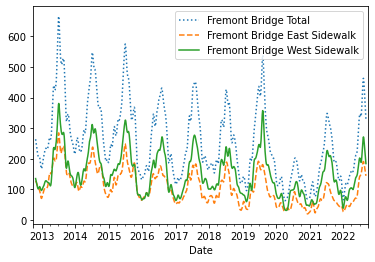

In [299]:
daily = df.resample('D').sum()
daily.rolling(50, center=True,win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

<h3>Q-3</h3>

In [300]:
df=pd.read_csv("stock_px_2.csv")

In [301]:
df.head()

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [303]:
df.set_index("Unnamed: 0",inplace=True)

In [304]:
df.head()

,AAPL,MSFT,XOM,SPX
Unnamed: 0,,,,
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00,7.28,21.31,28.83,909.93


<p><b>Indexing,Selection,Subsetting</b></p>

In [306]:
#by columns
df.loc[:,['XOM']]

,XOM
Unnamed: 0,
2003-01-02 00:00:00,29.22
2003-01-03 00:00:00,29.24
2003-01-06 00:00:00,29.96
2003-01-07 00:00:00,28.95
2003-01-08 00:00:00,28.83
...,...
2011-10-10 00:00:00,76.28
2011-10-11 00:00:00,76.27
2011-10-12 00:00:00,77.16


In [307]:
df.loc[:,['AAPL']]

,AAPL
Unnamed: 0,
2003-01-02 00:00:00,7.40
2003-01-03 00:00:00,7.45
2003-01-06 00:00:00,7.45
2003-01-07 00:00:00,7.43
2003-01-08 00:00:00,7.28
...,...
2011-10-10 00:00:00,388.81
2011-10-11 00:00:00,400.29
2011-10-12 00:00:00,402.19


In [309]:
#selection example
df['AAPL'][df['AAPL']>100]

Unnamed: 0
2007-05-02 00:00:00    100.39
2007-05-03 00:00:00    100.40
2007-05-04 00:00:00    100.81
2007-05-07 00:00:00    103.92
2007-05-08 00:00:00    105.06
                        ...  
2011-10-10 00:00:00    388.81
2011-10-11 00:00:00    400.29
2011-10-12 00:00:00    402.19
2011-10-13 00:00:00    408.43
2011-10-14 00:00:00    422.00
Name: AAPL, Length: 1023, dtype: float64

In [310]:
df['Sum']=df['AAPL']+df['SPX']+df['MSFT']+df['XOM']

In [312]:
df.head()

,AAPL,MSFT,XOM,SPX,Sum
Unnamed: 0,,,,,
2003-01-02 00:00:00,7.40,21.11,29.22,909.03,966.76
2003-01-03 00:00:00,7.45,21.14,29.24,908.59,966.42
2003-01-06 00:00:00,7.45,21.52,29.96,929.01,987.94
2003-01-07 00:00:00,7.43,21.93,28.95,922.93,981.24
2003-01-08 00:00:00,7.28,21.31,28.83,909.93,967.35


Text(0, 0.5, 'Year')

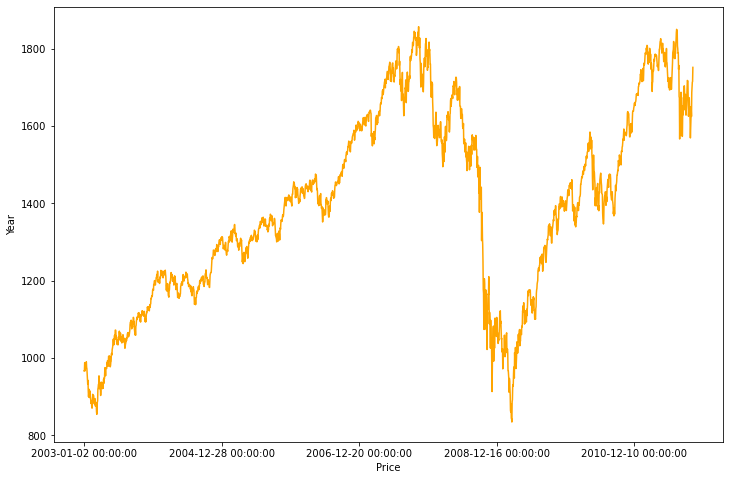

In [314]:
df.iloc[:,4].plot(figsize=(12,8),color='orange')
plt.xlabel('Price')
plt.ylabel('Year')

Text(0, 0.5, 'stock price')

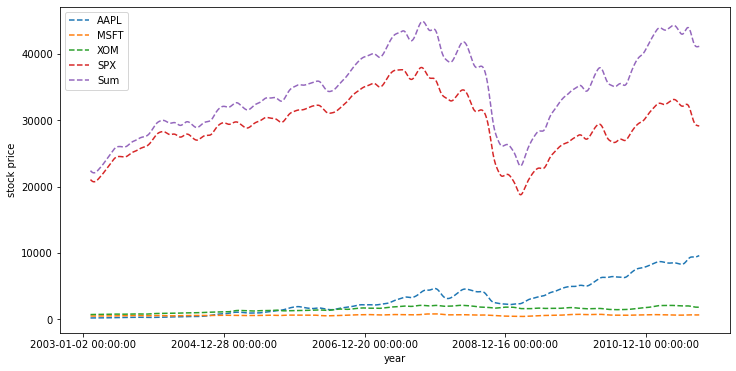

In [315]:
df.rolling(50, center=True,win_type='gaussian').sum(std=10).plot(style= '--',figsize=(12,6));
plt.xlabel("year")
plt.ylabel("stock price")

In [316]:
 #Date Ranges, Frequencies, and Shifting (Leading and Lagging) Data

In [317]:
from datetime import datetime
now = datetime.now().time() 
print("now =", now)

now = 15:44:31.309762


In [323]:
stock=df

In [324]:
import datetime
datetime.datetime.combine(datetime.date(2011, 1, 1), datetime.time(10, 23))

datetime.datetime(2011, 1, 1, 10, 23)

In [325]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [326]:
shift1=stock.shift(1, axis = 1)
shift1.head()

,AAPL,MSFT,XOM,SPX,Sum
Unnamed: 0,,,,,
2003-01-02 00:00:00,NaN,7.40,21.11,29.22,909.03
2003-01-03 00:00:00,NaN,7.45,21.14,29.24,908.59
2003-01-06 00:00:00,NaN,7.45,21.52,29.96,929.01
2003-01-07 00:00:00,NaN,7.43,21.93,28.95,922.93
2003-01-08 00:00:00,NaN,7.28,21.31,28.83,909.93


In [327]:
shift1=stock.shift(-2, axis = 0)
shift1.tail()

,AAPL,MSFT,XOM,SPX,Sum
Unnamed: 0,,,,,
2011-10-10 00:00:00,402.19,26.96,77.16,1207.25,1713.56
2011-10-11 00:00:00,408.43,27.18,76.37,1203.66,1715.64
2011-10-12 00:00:00,422.00,27.27,78.11,1224.58,1751.96
2011-10-13 00:00:00,NaN,NaN,NaN,NaN,NaN
2011-10-14 00:00:00,NaN,NaN,NaN,NaN,NaN


In [328]:
#Time Localization and conversion

In [329]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [330]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [331]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [332]:
import numpy as np
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -1.165177
2012-03-10 09:30:00   -1.735571
2012-03-11 09:30:00    1.253158
2012-03-12 09:30:00    0.346799
2012-03-13 09:30:00   -0.894477
2012-03-14 09:30:00    2.792039
Freq: D, dtype: float64

In [333]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.165177
2012-03-10 09:30:00+00:00   -1.735571
2012-03-11 09:30:00+00:00    1.253158
2012-03-12 09:30:00+00:00    0.346799
2012-03-13 09:30:00+00:00   -0.894477
2012-03-14 09:30:00+00:00    2.792039
Freq: D, dtype: float64

In [334]:
ts_utc.index


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [335]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern

2012-03-09 09:30:00-05:00   -1.165177
2012-03-10 09:30:00-05:00   -1.735571
2012-03-11 09:30:00-04:00    1.253158
2012-03-12 09:30:00-04:00    0.346799
2012-03-13 09:30:00-04:00   -0.894477
2012-03-14 09:30:00-04:00    2.792039
dtype: float64

In [336]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.165177
2012-03-10 14:30:00+00:00   -1.735571
2012-03-11 13:30:00+00:00    1.253158
2012-03-12 13:30:00+00:00    0.346799
2012-03-13 13:30:00+00:00   -0.894477
2012-03-14 13:30:00+00:00    2.792039
dtype: float64

In [337]:
#Periods and Period Arithmetic and Period Frequency Conversion

In [338]:
p = pd.Period(2010, freq='A-DEC')
p

Period('2010', 'A-DEC')

In [339]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [340]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [341]:
 rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [342]:
pts=ts.to_period()
pts

2012-03-09   -1.165177
2012-03-10   -1.735571
2012-03-11    1.253158
2012-03-12    0.346799
2012-03-13   -0.894477
2012-03-14    2.792039
Freq: D, dtype: float64

In [343]:
# Resampling and frequency conversion

In [347]:
stock=pd.read_csv("stock_px_2.csv")

In [349]:
stock

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93
...,...,...,...,...,...
2209,2011-10-10 00:00:00,388.81,26.94,76.28,1194.89
2210,2011-10-11 00:00:00,400.29,27.00,76.27,1195.54
2211,2011-10-12 00:00:00,402.19,26.96,77.16,1207.25
2212,2011-10-13 00:00:00,408.43,27.18,76.37,1203.66


In [350]:
stock.set_index("Unnamed: 0",inplace=True)

In [354]:
# # Moving Window Function